In [52]:
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [6]:
def json_to_csv(json_file, csv_file):
    json_data = None
    with open(json_file, 'r') as file:
        json_data = json.load(file)

    fieldnames = [field for field in json_data[0].keys() if field != 'time']

    # Write the CSV file
    with open(csv_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        # Write the header row
        writer.writerow(['time'] + fieldnames)
        # Write the data rows
        for row in json_data:
            time_value = row['time']
            other_values = [value[1] for value in row.values() if value[0] == time_value]
            writer.writerow([time_value] + other_values)

In [7]:
json_to_csv('data.json', 'data.csv')

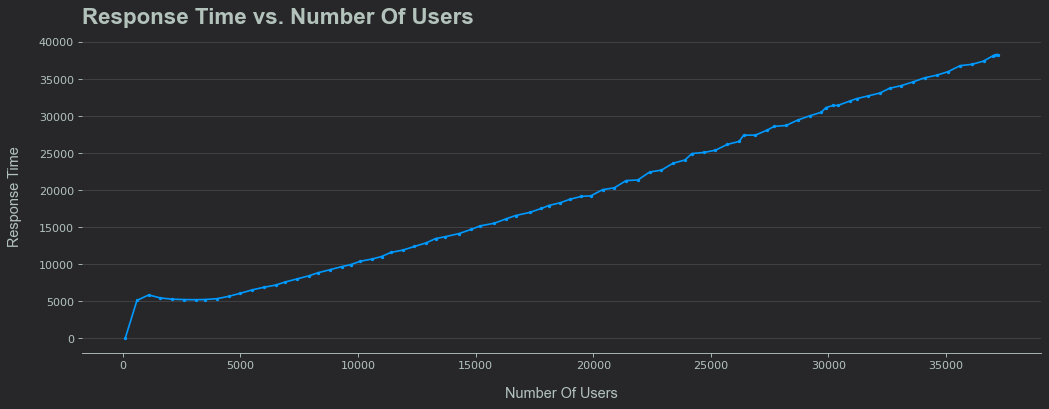

In [152]:
data = pd.read_csv('data.csv')

# Plot the data
plt.figure(figsize=(13, 5), dpi=80, constrained_layout=True)
plt.gcf().set_facecolor('#27272a')
plt.plot(data['user_count'], data['total_avg_response_time'], color='#0099ff', marker='o', markersize=2)

# Customize the plot
plt.title('Response Time vs. Number Of Users', color='#b3c3bc', pad=15, fontweight='semibold', loc='left', fontsize=20, fontname='Arial')
plt.xlabel('Number Of Users', labelpad=15, color='#b3c3bc', fontsize=13, fontname='Arial')
plt.ylabel('Response Time', labelpad=15, color='#b3c3bc', fontsize=13, fontname='Arial')
plt.grid(axis='y')
plt.gca().set_facecolor('#27272a')
plt.gca().tick_params(axis='x', colors='#b3c3bc')
plt.gca().tick_params(axis='y', colors='#b3c3bc')
plt.gca().spines['bottom'].set_color('#b3c3bc')
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.grid(color='#434348')
plt.show()